In [1]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1. Multi-layer Neural Network Practice

## (1) Load Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/euphoris/datasets/raw/master/imdb.zip')
print(df.shape)

(1000, 2)


In [3]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## (2) Data Cleaning

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(
    max_features=2000,
    stop_words='english'
)

tdm = cv.fit_transform(df['review'])
print(tdm.shape)

(1000, 2000)


## (3) Model Structure

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(tdm.shape[-1], )))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________


# 2. Learning Rate & Epoch Practice

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    tdm.A,
    df['sentiment'].values,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

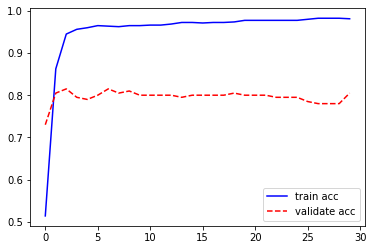

''

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'], 'b-', label='train acc')
plt.plot(history.history['val_acc'], 'r--', label='validate acc')

plt.legend()
plt.show()
;

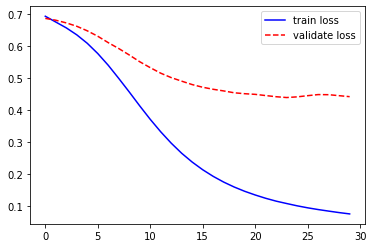

''

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='train loss')
plt.plot(history.history['val_loss'], 'r--', label='validate loss')

plt.legend()
plt.show()
;

# 3. Model Checkpoint Practice

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

FolderPath = '/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data'

CKP = ModelCheckpoint(
    filepath=FolderPath + '/' + 'model-{epoch:02d}',
    monitor='val_acc',
    save_best_only=True
)

history = model.fit(
    tdm.A,
    df['sentiment'].values,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=0,
    callbacks=[CKP]
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-01/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-02/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-03/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-08/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-11/assets


### 가장 마지막으로 저장된 버전 확인하기!

In [11]:
import glob

FName_last = sorted(glob.glob(FolderPath + '/' + 'model-*'))[-1]
print(FName_last)

/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/model-11


Therefore, epoch 11번째가 Best Model임을 알 수 있다!

In [12]:
from tensorflow.keras.models import load_model

# Load the Saved Model
model = load_model(FName_last)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________
